In [1]:
import numpy as np
import spyrit.misc.walsh_hadamard as wh
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import curve_fit

from spas import read_metadata, reconstruction_hadamard
from spas import ReconstructionParameters, setup_reconstruction

H = wh.walsh2_matrix(64)/64

In [2]:
def mean_spectrum(acquisition_metadata):
    
    ind_opt = acquisition_metadata.patterns[0::2]
    ind_opt = np.array(ind_opt)/2
    ind_opt = ind_opt.astype('int')
    M = spectral_data
    M_breve = M[0::2,:] + M[1::2,:]
    spectrum = np.mean(M_breve, axis=0)
    
    return spectrum

In [3]:
f = np.load('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_center/HgAr_Lamp_center_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-22_spectral_resolution_HgAr_Lamp/HgAr_Lamp_center/HgAr_Lamp_center_metadata.json')

recon_center = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

spectrum_center = mean_spectrum(acquisition_metadata)

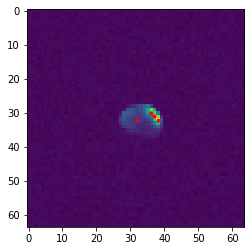

In [11]:
plt.imshow(np.sum(recon_center, axis=2))
plt.scatter(x=[36,37,38,32],y=[30,31,32,32],s=8,color='r')

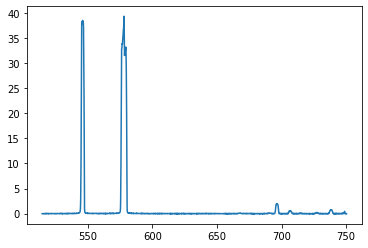

In [5]:
plt.plot(acquisition_metadata.wavelengths, np.sum(recon_center[30:33,36:39,:], axis=(0,1)))

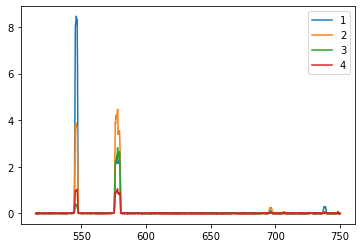

In [15]:
plt.plot(acquisition_metadata.wavelengths, recon_center[30,36,:],label='1')
plt.plot(acquisition_metadata.wavelengths, recon_center[31,37,:],label='2')
plt.plot(acquisition_metadata.wavelengths, recon_center[32,39,:],label='3')
plt.plot(acquisition_metadata.wavelengths, recon_center[32,32,:],label='4')
plt.legend()